# **Deep Learning Models for Product Categorization**

In this notebook, several famous Deep Learning models (like LSTM and some other transformer based models) are trained on the balanced dataset (the one balanced using undersampling technique). These models are then then evaluated with the help of Classification Report, Confusion Matrix, Accuracy Score, etc. All the Deep Learning models are implemented using the **PyTorch** framework owing to its fast computational power.


### ***Deep Learning Models Used for training and testing:***
1. Tranformer based models like:
* BERT
* RoBERTa
* DistilBERT
* XLNet
2. LSTM







## **Installing and Importing the required libraries and reasing the Dataset**

Several libraries related to Pytorch and needed for transformer based models are first installed. Other libraries related to Dataframe handling, preparation of the dataset for testing and training, etc are imported. The dataset that was balanced using Undersampling technique in the [first notebook](https://colab.research.google.com/drive/1Ht6pbVFlkudK7PzrDPmepiytHxPyhVBe?usp=sharing) has been used for both testing and training. This dataset consists of only those products which belong to the 13 major categories as described earlier (the data points that correspond to noise have been already removed). This dataset has already been cleaned using the data preprocessing tecniques like stopword removal, tokenization and lemmatization.

In [ ]:
!pip install torch==1.7.1
!pip install transformers
!pip install simpletransformers
!pip install tensorboardx
!pip install pytorch-nlp

ERROR: Could not find a version that satisfies the requirement torch==1.7.1 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0)
ERROR: No matching distribution found for torch==1.7.1


In [ ]:
# importing the libraries involved in matrix operations and dataframe handling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing libraries related to NLTK, vectorizers and string processing
import nltk
import string
nltk.download("all")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# other miscellaneous libraries used while preparing data for testing and evaluation
from collections import Counter
import re
from sys import maxsize
import random
import timeit
import datetime
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [ ]:
from google.colab import drive
drive.mount('drive', force_remount = True)

Mounted at drive


## **PART 1) Transformer Based Models:**

In the first part of the notebook Transformer based models like BERT and its variants like DistilBERT, RoBERTa and XLNet are trained and tested.

## **1) Training and Testing the Bidirectional Encoder Representations from Transformers (BERT) model**

The first transformer based model that is trained is BERT. BERT has shown amazing results in the field of NLP for several tasks like text classification, question answering, etc and hence, it was decided to try BERT as well to solve our problem of Product Categorization (Multiclass Classification).

In [ ]:
balanced_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/undersampling_balanced_products.csv")
balanced_df.sample(10)

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,...,description,product_rating,overall_rating,brand,product_specifications,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
10550,10550,a2f14c69402bf2508cc7f9ddeccc4bd1,2015-12-30 00:17:46 +0000,http://www.flipkart.com/vama-fashions-alloy-cu...,Viva Fashions Alloy Cubic Zirconia Rhodium Bangle,Jewellery,BBAEDZHYZZQHYEHU,900.0,900.0,"[""http://img6a.flixcart.com/image/bangle-brace...",...,Viva Fashions Alloy Cubic Zirconia Rhodium Ban...,No rating available,No rating available,Viva Fashions,"{""product_specification""=>[{""key""=>""Brand"", ""v...",jewellery,1,2.250000e-01,227.0,viva fashions alloy cubic zirconia rhodium ban...
349,349,9d442ef603d3149cf53c95d9b4cb490f,2016-01-06 18:20:45 +0000,http://www.flipkart.com/bluestone-princess-gol...,BlueStone The Princess Gold Diamond 18 K Ring,Jewellery,RNGDQ5GGSFNHNANZ,35415.0,26984.0,"[""http://img5a.flixcart.com/image/ring/w/z/v/5...",...,BlueStone The Princess Gold Diamond 18 K Ring ...,No rating available,No rating available,BlueStone,"{""product_specification""=>[{""key""=>""Pack of"", ...",jewellery,1,2.250000e-01,219.0,bluestone the princess gold diamond 18 k ring ...
5518,5518,cb0afa31d9ca796908fde019cd64044d,2015-12-01 06:13:00 +0000,http://www.flipkart.com/asus-rt-ac68u-dual-ban...,Asus RT-AC68U Dual-band Wireless-AC1900 Gigabi...,Computers,RTRDRDPR9JHCSBGH,25000.0,13390.0,"[""http://img6a.flixcart.com/image/router/b/g/h...",...,Buy Asus RT-AC68U Dual-band Wireless-AC1900 Gi...,4.3,4.3,Asus,"{""product_specification""=>[{""key""=>""In The Box...",electronics,1,2.250000e-01,182.0,buy asus rt-ac68u dual-band wireless-ac1900 gi...
5377,5377,9f1fc799de37a3325900ea892494af51,2015-12-01 06:13:00 +0000,http://www.flipkart.com/modx-steering-cover-hy...,Modx Steering Cover For Hyundai i10,Automotive,CSOE88UGU7GZPNZS,549.0,477.0,"[""http://img5a.flixcart.com/image/car-steering...",...,Buy Modx Steering Cover For Hyundai i10 for Rs...,No rating available,No rating available,Modx,"{""product_specification""=>[{""key""=>""Brand"", ""v...",automotive,1,4.500000e-01,201.0,buy modx steering cover for hyundai i10 for rs...
11220,11220,4fbc3935a634aa2dec2676641d52fcab,2015-12-30 00:17:46 +0000,http://www.flipkart.com/eves-pret-porter-women...,Eves Pret A Porter Women's Solid Casual Shirt,Clothing,SHTE9KP2PGR2MPHM,1200.0,399.0,"[""http://img6a.flixcart.com/image/shirt/g/s/7/...",...,Eves Pret A Porter Women's Solid Casual Shirt ...,No rating available,No rating available,Slim,"{""product_specification""=>[{""key""=>""Pattern"", ...",clothing,1,-7.500000e-02,220.0,eves pret a porter women's solid casual shirt ...
7234,7234,544e9220edf5182b62dd8d955d347784,2016-04-16 13:01:18 +0000,http://www.flipkart.com/emagica-home-security-...,Emagica Home Security 1 Channel Home Security ...,Pens & Stationery,HSAEGZAV4UGWJAAH,3590.0,2420.0,"[""http://img5a.flixcart.com/image/home-securit...",...,Key Features of Emagica Home Security 1 Channe...,No rating available,No rating available,Emagica,"{""product_specification""=>[{""value""=>""1 Home S...",toys&schoolsupplies,1,1.572055e-01,1632.0,key features of emagica home security 1 channe...
6845,6845,41c459b3b531aa0b725155a97e429b85,2016-03-05 04:18:53 +0000,http://www.flipkart.com/kits-kart-pouch-intex-...,kits kart Pouch for Intex Aqua i5 Mini,Mobiles & Accessories,ACCEGH6RPWY9DHAB,908.0,454.0,"[""http://img5a.flixcart.com/image/cases-covers...",...,Key Features of kits kart Pouch for Intex Aqua...,No rating available,No rating available,kits kart,"{""product_specification""=>[{""key""=>""Brand"", ""v...",electronics,1,1.361527e-01,1678.0,key features of kits kart pouch for intex aqua...
13105,13105,c41e4520b3daaf2edd11f80234bb28fd,2015-12-12 11:46:53 +0000,http://www.flipkart.com/my-foot-women-wedges/p...,My Foot Women Wedges,Footwear,SNDEAN42PCMFHQAR,1599.0,956.0,"[""http://img5a.flixcart.com/image/sandal/c/z/q...",...

In [ ]:
balanced_df.shape

(14999, 21)

In [ ]:
#printing all the 13 major categories and the frequency of their products in the dataset
Counter(balanced_df['primary_categories'])

Counter({'clothing': 5316,
         'footwear': 1083,
         'toys&schoolsupplies': 535,
         'personalaccessories': 684,
         'homefurnishing/kitchen': 1324,
         'automotive': 937,
         'tools&hardware': 379,
         'babycare': 224,
         'electronics': 1299,
         'jewellery': 3218})

## **Splitting the dataset into Training and Testing Dataframes**

The dataset has been split in the initial stages only into training and testing dataframes using the train_test_split function available in sci-kit learn package.

In [ ]:
#splitting the dataframe into test and training dataframe

balanced_df, test_df = train_test_split(balanced_df, test_size=0.1, random_state = 2018)
print(balanced_df.shape, test_df.shape)

(13499, 21) (1500, 21)


### **The GPU provided by Google Colab has been used for Training**

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


## **Encoding the Product Categories**

Encoding of the 13 Product Categories is done using LabelEncoder. This is done so because the string categories cannot be directly passed into the model and hence, they have to be represented in a numerical format.

In [ ]:
encoder = LabelEncoder()
balanced_df['categories']=encoder.fit_transform(balanced_df['primary_categories'])
print(Counter(balanced_df['categories']))

prediction_decoded = encoder.inverse_transform(balanced_df['categories'])
print(Counter(prediction_decoded))

Counter({2: 4771, 6: 2902, 5: 1173, 3: 1169, 4: 969, 0: 853, 7: 628, 9: 491, 8: 342, 1: 201})
Counter({'clothing': 4771, 'jewellery': 2902, 'homefurnishing/kitchen': 1173, 'electronics': 1169, 'footwear': 969, 'automotive': 853, 'personalaccessories': 628, 'toys&schoolsupplies': 491, 'tools&hardware': 342, 'babycare': 201})


## **BERT Specific Tokenization & Input Formatting**

As BERT model requires some specific tokens and input formattings, BertTokenizer has been installed for the same. In this notebook, we have used the **'uncased'** version.

In [ ]:
#loading the BERT tokenizer
from transformers import BertTokenizer

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


## **Manipulating the data according to the required Input formatting**

The input format required by BERT asks us to add special tokens to the start and end of the sentence, pad and truncate all the sentences to a specific constant length and differentiate the pads from tokens by using attention masks.

### **To get an idea about the length of the description and its corresponding frequency**

As we have to explicitly pad and truncate all the sentences to a fixed constant length, visualisation of the text length of the cleaned and pre processed data is done in order to select a value that is as close to the actual value (so that we do not lose useful information)

<Axes: >

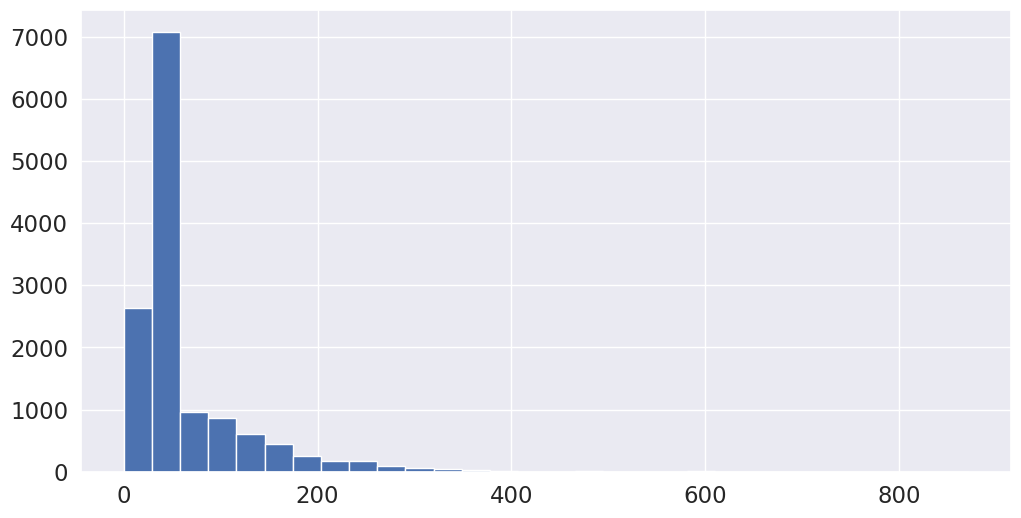

In [ ]:
desc = balanced_df["cleaned_desc"].tolist()

# Handle potential float values in 'desc'
seq_len = [len(str(i).split()) if not isinstance(i, float) else 0 for i in desc]
pd.Series(seq_len).hist(bins = 30)

From the above graph, we can see that most of the description lengths are less than 100 words. **Hence, the MAX_LEN has been chosen to be 128**.

## **Data Formatting and Training of the BERT Model**

In the following code snippets, the training data has been first prepared according to BERT's requirements and then split into training and validation sets. The model is then trained and validated and finally tested on the testing dataframe that was made earlier.

### 1. Mapping the sentences to their Word IDs

In the following code snippet, with the help of **tokenizer.encode()** function splits the sentences into tokens and adds the special tokens to the start and end of the tokens and finally maps them to their corresponding word IDS.

In [ ]:
#tokenization of all the sentences followed by the mapping of the tokens to their word ids
tokenized_inputs = []
tokenized_len = []
input_data = balanced_df["cleaned_desc"].tolist()

for sentence in input_data:
  '''
    tokenizer.encode does the following:
    1. tokenizes the sentences
    2. adds [CLS] to the start of the tokens and [SEP] to the end of the tokens
    3. Maps the tokens to their word IDS
  '''
  # Handle potential NaN values and other non-string types
  if isinstance(sentence, str):
    encoded_sentence = tokenizer.encode(sentence, add_special_tokens=True)
    tokenized_inputs.append(encoded_sentence)
    tokenized_len.append(len(encoded_sentence))
  else:
    # Handle NaN or non-string values by appending an empty list (or another suitable default)
    tokenized_inputs.append([])  # Replace [] with a suitable default if needed
    tokenized_len.append(0)
    print(f"Skipping non-string value: {sentence}")

balanced_df["Token_ids"] = tokenized_inputs

Token indices sequence length is longer than the specified maximum sequence length for this model (558 > 512). Running this sequence through the model will result in indexing errors


Skipping non-string value: nan


The following Seaborn plot helps us in visualising the distribution of token lengths across the entire corpus.

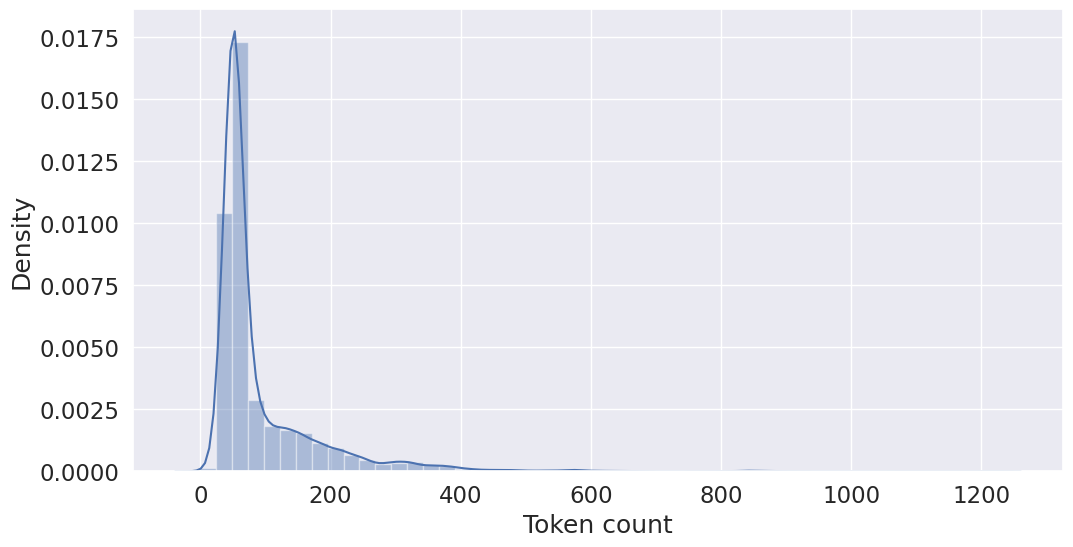

In [ ]:
sns.distplot(tokenized_len)
plt.xlabel('Token count');

### 2. Padding and Truncating the Word IDs and creating Attention Masks

As the tokenizer.encode() function does not handle padding, it is handled separately using pad_sequence and thus, the tokens are then truncated to a MAX_LEN of 128 that was chosen above. Finally, to separate the paddings from the tokens attention masks are created.

In [ ]:
# from the above, we can see that most of the sentences are below 200 -> choosing a max_len of 128
max_len = 128
#padding and truncating the sentences according to the maximum length
tokenized_inputs = pad_sequences(balanced_df["Token_ids"], maxlen=max_len, dtype="long",value=0, truncating="post", padding="post")

#creating the attention masks
attention_mask = []

for sentence in tokenized_inputs:
  temp_mask = [int(token_id>0) for token_id in sentence]
  attention_mask.append(temp_mask)

### 3. Splitting the dataset into training and validation set

The input descriptions, labels and attention masks are then converted into PyTorch tensors. Then these are split into training and validation sets for training the model and testing it. Then for the training and validation sets, dataloaders are created.

In [ ]:
description_inputs = torch.tensor(tokenized_inputs)
category_labels = torch.tensor(balanced_df["categories"].values)
mask = torch.tensor(attention_mask)

print(description_inputs.shape, category_labels.shape, mask.shape)

#splitting the dataset and attention masks
training_dataset, validation_dataset, training_categories, validation_categories = train_test_split(description_inputs,
                                                                                                    category_labels,
                                                                                                    random_state = 42,
                                                                                                    test_size = 0.15,
                                                                                                    shuffle=True)

training_mask, validation_mask, _, _ = train_test_split(mask,
                                                        category_labels,
                                                        random_state = 42,
                                                        test_size = 0.15,
                                                        shuffle=True)

torch.Size([13499, 128]) torch.Size([13499]) torch.Size([13499, 128])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#barch size has been chosen to be 16 as a batch size of 32 gave out of memory errors (limitation)
BATCH_SIZE = 16

# creating the dataloader for the training dataset
training_data = TensorDataset(training_dataset, training_mask, training_categories)
training_dataloader = DataLoader(training_data, sampler=RandomSampler(training_data), batch_size=BATCH_SIZE)

# creating the dataloader for the validation dataset
validation_data = TensorDataset(validation_dataset, validation_mask, validation_categories)
validation_dataloader = DataLoader(validation_data, sampler=SequentialSampler(validation_data), batch_size=BATCH_SIZE)

### 4. Training the Multiclass Classification Model

For training our model we have modified the pre-trained BERT model to perform Multiclass Classification. We are using BertForSequenceClassification model and the "bert-base-uncased" model variant for the same. AdamW Optimizer has been used and the following hyperparameters are used for fine-tuning:

1. Number of epochs: 4
2. Learning Rate: 3e-5
3. BATCH_SIZE was chosen to be 32 while creating the DataLoaders

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

# choosing the model version that has only lowercase characters and is the smaller one out the two versions
option_name = "bert-base-uncased"

model = BertForSequenceClassification.from_pretrained(option_name,
                                                      num_labels = 13,
                                                      output_attentions = False,
                                                      output_hidden_states = False)
model.cuda()

#optimzer: object that actually performs updates to our weights
optimizer = AdamW(model.parameters(),
                  lr = 3e-5,
                  eps = 1e-8)

# number of training epochs
epochs = 4

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
#HELPER FUNCTIONS

# this function takes time in seconds and returns a string hh:mm:ss
def format_time(elapsed):
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

# this function calculates the accuracy by taking in the predicted and actual labels as parameters
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
import random
import numpy as np
import timeit
import datetime

# Assuming you have defined training_dataset, training_mask, training_categories,
# validation_dataset, validation_mask, and validation_categories in previous cells

# Batch size
BATCH_SIZE = 16

# Creating dataloaders
training_data = TensorDataset(training_dataset, training_mask, training_categories)
training_dataloader = DataLoader(training_data, sampler=RandomSampler(training_data), batch_size=BATCH_SIZE)

validation_data = TensorDataset(validation_dataset, validation_mask, validation_categories)
validation_dataloader = DataLoader(validation_data, sampler=SequentialSampler(validation_data), batch_size=BATCH_SIZE)

# Model and optimizer
option_name = "bert-base-uncased"
model = BertForSequenceClassification.from_pretrained(option_name,
                                                      num_labels=13,
                                                      output_attentions=False,
                                                      output_hidden_states=False)
model.cuda()

optimizer = AdamW(model.parameters(),
                  lr=3e-5,
                  eps=1e-8)

# Number of training epochs
epochs = 4

# Helper functions
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Training loop
def train_model(model, optimizer, train_loader, valid_loader, num_epochs, eval_every):
    seed_val = 42
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

    train_loss_list = []
    valid_loss_list = []
    running_loss = 0.0
    valid_loss = 0.0

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    for each_epoch in range(num_epochs):
        print('\n')
        print("*************** Epoch {:}/{:} ***************".format(each_epoch+1, num_epochs))
        print("Training....")

        start = timeit.default_timer()
        running_loss = 0.0
        model.train()

        for step, (input_desc_ids, input_mask, input_label) in enumerate(train_loader):
            if step % eval_every == 0 and step != 0:
                stop = timeit.default_timer()
                time_elapsed = format_time(stop - start)
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_loader), time_elapsed))

            input_desc_ids = input_desc_ids.to(device)
            input_mask = input_mask.to(device)
            input_label = input_label.to(device)
            model.zero_grad()

            outputs = model(input_desc_ids,
                            token_type_ids=None,
                            attention_mask=input_mask,
                            labels=input_label)

            loss = outputs.loss
            running_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

        average_train_loss = running_loss / len(train_loader)
        train_loss_list.append(average_train_loss)

        print('\n')
        print("  Average training loss: {0:.2f}".format(average_train_loss))

        print("\n")
        print("Validating....")

        start = timeit.default_timer()
        model.eval()

        valid_accuracy = 0.0
        steps_eval = 0

        for (input_ids, input_masks, input_labels) in valid_loader:
            input_ids = input_ids.to(device)
            input_masks = input_masks.to(device)
            input_labels = input_labels.to(device)

            with torch.no_grad():
                outputs = model(input_ids,
                                token_type_ids=None,
                                attention_mask=input_masks)

            logits = outputs.logits.detach().cpu().numpy()
            label_ids = input_labels.to('cpu').numpy()

            temp_accuracy = flat_accuracy(logits, label_ids)
            valid_accuracy += temp_accuracy
            steps_eval += 1

        average_valid_accuracy = valid_accuracy / steps_eval
        valid_loss_list.append(average_valid_accuracy)

        print("  Accuracy: {0:.2f}".format(average_valid_accuracy))
        print("  Validation took: {:}".format(format_time(timeit.default_timer() - start)))

    print("\n")
    print("Training complete!!!")

    return train_loss_list, valid_loss_list

# Train the Model
train_loss_list, valid_loss_list = train_model(model=model,
                                               optimizer=optimizer,
                                               train_loader=training_dataloader,
                                               valid_loader=validation_dataloader,
                                               num_epochs=epochs,
                                               eval_every=len(training_dataloader) // 4)

print("Training Loss List:", train_loss_list)
print("Validation Loss List:", valid_loss_list)


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW
import random
import numpy as np
import timeit
import datetime

# Assuming you have defined training_dataset, training_mask, training_categories,
# validation_dataset, validation_mask, and validation_categories in previous cells

# Batch size
BATCH_SIZE = 16

# Creating dataloaders
training_data = TensorDataset(training_dataset, training_mask, training_categories)
training_dataloader = DataLoader(training_data, sampler=RandomSampler(training_data), batch_size=BATCH_SIZE)

validation_data = TensorDataset(validation_dataset, validation_mask, validation_categories)
validation_dataloader = DataLoader(validation_data, sampler=SequentialSampler(validation_data), batch_size=BATCH_SIZE)

# Model and optimizer
option_name = "bert-base-uncased"
model = BertForSequenceClassification.from_pretrained(option_name,
                                                      num_labels=13,
                                                      output_attentions=False,
                                                      output_hidden_states=False)
model.cuda()

optimizer = AdamW(model.parameters(),
                  lr=3e-5,
                  eps=1e-8)

# Number of training epochs
epochs = 4

# Helper functions
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Training loop
def train_model(model, optimizer, train_loader, valid_loader, num_epochs, eval_every):
    seed_val = 42
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

    train_loss_list = []
    valid_loss_list = []
    running_loss = 0.0
    valid_loss = 0.0

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    for each_epoch in range(num_epochs):
        print('\n')
        print("*************** Epoch {:}/{:} ***************".format(each_epoch+1, num_epochs))
        print("Training....")

        start = timeit.default_timer()
        running_loss = 0.0
        model.train()

        for step, (input_desc_ids, input_mask, input_label) in enumerate(train_loader):
            if step % eval_every == 0 and step != 0:
                stop = timeit.default_timer()
                time_elapsed = format_time(stop - start)
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_loader), time_elapsed))

            input_desc_ids = input_desc_ids.to(device)
            input_mask = input_mask.to(device)
            input_label = input_label.to(device)
            model.zero_grad()

            outputs = model(input_desc_ids,
                            token_type_ids=None,
                            attention_mask=input_mask,
                            labels=input_label)

            loss = outputs.loss
            running_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

        average_train_loss = running_loss / len(train_loader)
        train_loss_list.append(average_train_loss)

        print('\n')
        print("  Average training loss: {0:.2f}".format(average_train_loss))

        print("\n")
        print("Validating....")

        start = timeit.default_timer()
        model.eval()

        valid_accuracy = 0.0
        steps_eval = 0

        for (input_ids, input_masks, input_labels) in valid_loader:
            input_ids = input_ids.to(device)
            input_masks = input_masks.to(device)
            input_labels = input_labels.to(device)

            with torch.no_grad():
                outputs = model(input_ids,
                                token_type_ids=None,
                                attention_mask=input_masks)

            logits = outputs.logits.detach().cpu().numpy()
            label_ids = input_labels.to('cpu').numpy()

            temp_accuracy = flat_accuracy(logits, label_ids)
            valid_accuracy += temp_accuracy
            steps_eval += 1

        average_valid_accuracy = valid_accuracy / steps_eval
        valid_loss_list.append(average_valid_accuracy)

        print("  Accuracy: {0:.2f}".format(average_valid_accuracy))
        print("  Validation took: {:}".format(format_time(timeit.default_timer() - start)))

    print("\n")
    print("Training complete!!!")

    return train_loss_list, valid_loss_list

# Train the Model
train_loss_list, valid_loss_list = train_model(model=model,
                                               optimizer=optimizer,
                                               train_loader=training_dataloader,
                                               valid_loader=validation_dataloader,
                                               num_epochs=epochs,
                                               eval_every=len(training_dataloader) // 4)

print("Training Loss List:", train_loss_list)
print("Validation Loss List:", valid_loss_list)

## **Testing the Perfomance on the Testing Dataframe**

The earlier testing dataset is now read and it is formatted int he same way as the training dataset to be fed to the BERT model in order to predict the product categories. In the following code snippets, first the Product Category encoding is done followed by replicating the same steps involving tokenization and input formatting.

### **Reading the testing dataframe**

In [ ]:
test_df.sample(10)

### **Encoding the Product Categories**

The same encoding that was followed for the training set is done in the code snippet below as well.

In [ ]:
test_df['categories']=encoder.fit_transform(test_df['primary_categories'])
print(Counter(test_df['categories']))

prediction_decoded = encoder.inverse_transform(test_df['categories'])
print(Counter(prediction_decoded))

In [ ]:
test_description = test_df["cleaned_desc"].values
test_labels = test_df["categories"].values

In [ ]:
#converting into tokens
test_ids = []

for sentence in test_description:
  encoded_sentence = tokenizer.encode(sentence,
                                  add_special_tokens = True)

  test_ids.append(encoded_sentence)

test_ids = pad_sequences(test_ids,
                         maxlen=max_len,
                        dtype="long",
                        truncating="post",
                         padding="post")

# creating the attention masks
attention_masks = []

for id in test_ids:
  temp_mask = [int(i>0) for i in id]
  attention_masks.append(temp_mask)

# converting into tensors
prediction_inputs = torch.tensor(test_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(test_labels)

In [ ]:
#creating the Pytorch Dataloader
testing_data = TensorDataset(prediction_inputs,
                                prediction_masks,
                                prediction_labels)

testing_dataloader = DataLoader(testing_data,
                                   sampler=SequentialSampler(testing_data),
                                   batch_size=BATCH_SIZE)

## **Evaluation Function**

Our fine tuned model is now applied to the prepared testing dataset to generate predictions on the same and calculate the accuracy by comparing it to the actual labels.

In [ ]:
def evaluation(model = model,
               test_loader = testing_dataloader):

  print('Predicting labels for {:,} test descriptions'.format(len(testing_data)))

  #initialising the running variables
  predictions = []
  true_categories = []

  #putting the model in avaluation mode
  model.eval()

  for (test_desc_ids, test_mask, test_label) in test_loader:

    # adding the batch variables to the GPU
    test_desc_ids = test_desc_ids.to(device)
    test_mask = test_mask.to(device)
    test_label = test_label.to(device)

    with torch.no_grad():
      #forward pass
      #calculating the logit predictions
      outputs = model(test_desc_ids,
                      token_type_ids=None,
                      attention_mask = test_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = test_label.to('cpu').numpy()

    # Store predictions and true labels
    predictions.extend(list( np.argmax(logits, axis=1).flatten()))
    true_categories.extend(list(label_ids.flatten()))

  print("Evaluation done!!!")

  return true_categories, predictions


In [ ]:
true_labels, pred_labels = evaluation()

## **Calculating the Evaluation Metrics**

Classification Report has been printed and a plot of Training and Validation loss was plotted to get an idea about the accuracy of the model and how well our BERT based model will perform on real world data.

In [ ]:
print('Classification Report:')
print(classification_report(true_labels, pred_labels))

plt.figure(figsize = (10,10))
cm = confusion_matrix(true_labels, pred_labels)
cm = cm / cm.astype(float).sum(axis=1)  # Replace np.float with float
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [ ]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')
# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Initialize lists to store loss values (if not already done elsewhere)
train_loss_list = []  # Initialize an empty list for training losses
valid_loss_list = []  # Initialize an empty list for validation losses

# (Presumably you have some training loop where you append loss values to these lists)

# Plot the learning curve.
plt.plot(train_loss_list, label="train")
plt.plot(valid_loss_list, label="validation")

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## **Variants of BERT**

Other BERT based pre-trained models have also been explored such as DistilBERT, RoBERTa and XLNet. In the following code snippets, the already pre trained model is trained and then evaluated using the **eval_model()** function. Some of the other evaluation metrics that have been used are f1 score and accuracy score.

In [ ]:
custom_arguments = {
    "output_dir": "outputs/",
    "cache_dir": "cache/",
    "best_model_dir": "outputs/best_model/",

    "fp16": False,
    "fp16_opt_level": "O1",
    "max_seq_length": 128,
    "train_batch_size": 128,
    "eval_batch_size": 128,
    "gradient_accumulation_steps": 1,
    "num_train_epochs": 1,
    "weight_decay": 0,
    "learning_rate": 1e-4,
    "adam_epsilon": 1e-8,
    "warmup_ratio": 0.06,
    "warmup_steps": 0,
    "max_grad_norm": 1.0,
    "do_lower_case": False,

    "logging_steps": 50,
    "evaluate_during_training": False,
    "evaluate_during_training_steps": 2000,
    "evaluate_during_training_verbose": False,
    "use_cached_eval_features": False,
    "save_eval_checkpoints": True,
    "no_cache": False,
    "save_model_every_epoch": True,
    "tensorboard_dir": None,

    "overwrite_output_dir": True,
    "reprocess_input_data": True,

    "n_gpu": 1,
    "silent": False,
    "use_multiprocessing": True,

    "wandb_project": None,
    "wandb_kwargs": {},

    "use_early_stopping": True,
    "early_stopping_patience": 3,
    "early_stopping_delta": 0,
    "early_stopping_metric": "eval_loss",
    "early_stopping_metric_minimize": True,

    "manual_seed": None,
    "encoding": None,
    "config": {},
}

## **2) Training and Testing on the RoBERTa model, a variant of BERT**

In [ ]:
torch.cuda.empty_cache()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/undersampling_balanced_products.csv")
df.head()

In [ ]:
print(df.shape)
print(df.columns.values)

## **Dataset Preparation**

In data_preparation() function below, the strings in the categories column are encoded to be a numerical value. Further many of the columns which are not necessary are dropped keeping only the **cleaned_desc** and **labels** column (according to the input parameter requirements of the pre-trained RoBERTa model. The dataset is also split into training and testing datasets in this function itself.

In [ ]:
import torchnlp
from torchnlp.encoders import LabelEncoder
from simpletransformers.model import TransformerModel

# number of categories that the products can be divided into has been decided to be 13
n_classes = 13

def data_preparation(df,
                     categories = 'primary_categories', ):

  df_temp = df.copy(deep=True)

  encoder = LabelEncoder(df["primary_categories"])
  temp_list = encoder.batch_encode(df[categories].tolist())
  temp_list = temp_list.numpy()
  temp_list = [label-1 for label in temp_list]
  df_temp['final_categories'] = pd.Series(temp_list)

  train_df, test_df = train_test_split(df_temp, test_size=0.15)

  return train_df, test_df


In [ ]:
train_df, test_df = data_preparation(df)

**Dropping the unnecessary columns from the training and testing datasets**

In [ ]:
train_df = train_df.drop(['Unnamed: 0', 'product_name', 'brand', 'desc_pol', 'desc_len', 'product_category_tree', 'description', 'primary_categories', 'main_category'],axis=1)
test_df = test_df.drop(['Unnamed: 0', 'product_name', 'brand', 'desc_pol', 'desc_len', 'product_category_tree', 'description', 'primary_categories', 'main_category'], axis=1)

In [ ]:
train_df.reset_index(inplace=True)
train_df = train_df.drop(['index'],axis=1)
train_df.head()

In [ ]:
test_df.reset_index(inplace=True)
test_df = test_df.drop(['index'],axis=1)
test_df.head()

## **Creating a Transformer Model of type "roberta"**

The following code snippet creates a Transformer Model for training, evaluation and prediction. As mentioned previously, wthe no of labels in which we are classifying our dataset is 13.

In [ ]:
#creating the Transformer Model
roberta_model = TransformerModel('roberta', 'roberta-base', num_labels=n_classes, args = custom_arguments, use_cuda=False)

**Calling the train_model() method to train the RoBERTa Transformer Model**

In [ ]:


# Now, train the model
roberta_model.train_model(train_df)

**Evaluation of the RoBERTa Model**

Other indicator functions are also passed as a parameter to the eval_model() method. We have also calculated the **f1 score** and the **accuracy score** for our model by passing them as arguments in the eval_model() function with the help of scikit-learn library.

In [ ]:
import pandas as pd
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.metrics import f1_score, accuracy_score

# Function to calculate multiclass F1 score
def multiclass_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

# Assuming your test DataFrame is named `test_df`
# Print the DataFrame columns to verify the column names
print("Columns in test_df:", test_df.columns)

# Print first few rows to inspect the data
print("First few rows of test_df:\n", test_df.head())

# Check and convert labels to integer
if 'labels' not in test_df.columns:
    raise KeyError("'labels' column not found in test_df")

label_mapping = {label: idx for idx, label in enumerate(test_df['labels'].unique())}
print("Label mapping:", label_mapping)

test_df['labels'] = test_df['labels'].map(label_mapping)
if test_df['labels'].isnull().any():
    raise ValueError("Mapping resulted in NaN values. Please check the label_mapping.")

# Ensure DataFrame has correct column names
expected_columns = ['text', 'labels']
if not all(column in test_df.columns for column in expected_columns):
    raise KeyError(f"Expected columns {expected_columns} not found in test_df")

# Verify labels are single-dimensional and integers
assert test_df['labels'].dtype == int, "Labels are not integers"
assert test_df['labels'].ndim == 1, "Labels are not single-dimensional"

# Load your model
model = ClassificationModel('roberta', 'path/to/your/model', num_labels=len(label_mapping))

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=multiclass_f1_score, acc=accuracy_score)

print(result)
print(model_outputs)
print(wrong_predictions)


In [ ]:
from sklearn.metrics import f1_score, accuracy_score

def multiclass_f1_score(labels, predictions):
      return f1_score(labels, predictions, average='micro')

In [ ]:
result, model_outputs, wrong_predictions = roberta_model.eval_model(test_df, f1 = multiclass_f1_score, acc = accuracy_score)

## **3) Training and Testing on the DistilBERT model, a variant of BERT**

In [ ]:
distilbert_model = TransformerModel('bert', 'bert-base-uncased', num_labels=n_classes, args = custom_arguments)

In [ ]:
train_df, test_df = data_preparation(df)

**Dropping the unnecessary columns from the training and testing datasets**

In [ ]:
train_df = train_df.drop(['Unnamed: 0', 'product_name', 'brand', 'desc_pol', 'desc_len', 'product_category_tree', 'description', 'primary_categories', 'main_category'],axis=1)
test_df = test_df.drop(['Unnamed: 0', 'product_name', 'brand', 'desc_pol', 'desc_len', 'product_category_tree', 'description', 'primary_categories', 'main_category'], axis=1)

In [ ]:
train_df.reset_index(inplace=True)
train_df = train_df.drop(['index'],axis=1)
train_df.head()

In [ ]:
test_df.reset_index(inplace=True)
test_df = test_df.drop(['index'],axis=1)
test_df.head()

In [ ]:
distilbert_model.train_model(train_df)

In [ ]:
result, model_outputs, wrong_predictions = distilbert_model.eval_model(test_df, f1 = multiclass_f1_score, acc = accuracy_score)
print(result)

## **4) Training and Testing on the XLNet model, a variant of BERT**

In [ ]:
xlnet_model = TransformerModel('xlnet', 'xlnet-base-cased', num_labels=n_classes)

In [ ]:
train_df, test_df = data_preparation(df)

In [ ]:
train_df = train_df.drop(['Unnamed: 0', 'product_name', 'brand', 'desc_pol', 'desc_len', 'product_category_tree', 'description', 'primary_categories', 'main_category'],axis=1)
test_df = test_df.drop(['Unnamed: 0', 'product_name', 'brand', 'desc_pol', 'desc_len', 'product_category_tree', 'description', 'primary_categories', 'main_category'], axis=1)

In [ ]:
train_df.reset_index(inplace=True)
train_df = train_df.drop(['index','dropped_columns'],axis=1)
train_df.head()

In [ ]:
test_df.reset_index(inplace=True)
test_df = test_df.drop(['index', 'dropped_columns'],axis=1)
test_df.head()

In [ ]:
xlnet_model.train_model(train_df)

In [ ]:
result, model_outputs, wrong_predictions = xlnet_model.eval_model(test_df, f1 = multiclass_f1_score, acc = accuracy_score)
print(result)

## **PART 2) Long-Short Term Memory (LSTM) based Model:**

In the second part of the notebook, LSTM based Deep Learning model is used to solve the problem of Multiclass Product Categorization. The same undersampled balanced dataset that was used for training and evaluating Tranformer based models has also been used in this part for ease of comparison of the results and the working of the model. This already cleaned and pre processed dataset consists of only those data points that can be categorized in the previously mentioned 13 primary categories.

In [ ]:
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.legacy import data

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#seeding the value to make the results reproducable
seed = 42
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

## **Reading and PreProcessing the Dataset**

This dataset os tokenized with the help of **spacy** tokenizer to meet the requirements before passing into the LSTM Model.

In [ ]:
TEXT = data.Field(tokenize='spacy',batch_first=True,include_lengths=True, lower = True)
LABEL = data.LabelField(dtype = torch.float,batch_first=True, lower = True)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/undersampling_balanced_products.csv")
df.head()

In [ ]:
print(df.shape)

In [ ]:
fields = [(None, None), (None, None), (None, None), (None, None), (None, None), ('primary_categories',LABEL), (None, None), (None, None), (None, None), ('cleaned_desc', TEXT)]

In [ ]:
train_data = data.TabularDataset(path = '/content/drive/MyDrive/Flipkart Product Dataset/undersampling_balanced_products.csv', format = 'csv', fields = fields, skip_header = True)


print(vars(train_data.examples[0]))

In [ ]:
#splitting the dataframe into training, validation and test sets
# training set + validation set: 80%, test set: 20%

train_data, test_data = train_data.split(split_ratio=0.80,)

training_data, validation_data = train_data.split(split_ratio=0.85,)

## **Preparation of Input and Output Sequences**

The vocabulary is built for the product description which is later then converted into integer sequences. In the following code snippet, we have built the vocabulary and initialized the cleaned description with the pretrained embeddings.



In [ ]:
TEXT.build_vocab(training_data,min_freq=3,vectors = 'glove.6B.300d')
LABEL.build_vocab(training_data)

The data is prepared in the form of batches and BucketIterator is used for the same.

In [ ]:
BATCH_SIZE = 16

#Load an iterator
train_iterator, valid_iterator = data.BucketIterator.splits((training_data, validation_data),
                                                            batch_size = BATCH_SIZE,
                                                            sort_key = lambda x: len(x.cleaned_desc),
                                                            sort_within_batch=True,
                                                            device = device)

## **Defining the Model Architecture**

In the following code snippet, we have defined our model architecture to perform the multiclass classification problem.

In [ ]:
import torch.nn as nn

class LSTMClassifier(nn.Module):


    def __init__ (self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):

        super().__init__()
        #embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        #lstm layer
        self.lstm = nn.LSTM(embedding_dim,
                           hidden_dim,
                           num_layers=n_layers,
                           bidirectional=bidirectional,
                           dropout=dropout,
                           batch_first=True)
        # dense layer
        self.dense = nn.Linear(hidden_dim * 2, output_dim)
        # softmax activation function
        self.softmax = nn.Softmax()


    def forward(self, text, text_lengths):

        embedded = self.embedding(text)
        #packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths,batch_first=True)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        #concatinating the final forward and backward hidden state
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
        #hidden = [batch size, hid dim * num directions]
        dense_outputs=self.dense(hidden)
        #Final activation function
        outputs=self.softmax(dense_outputs)

        return outputs

In the following code snippet, we have defined the hyperparameters and instantiated our LSTM Model.

In [ ]:
vocab_size = len(TEXT.vocab)
embedding_dim = 300
num_hidden_nodes = 32
num_output_nodes = 13
dropout = 0.2
bidirectional = True
no_layers = 2

lstm_model = LSTMClassifier(vocab_size, embedding_dim, num_hidden_nodes,num_output_nodes, no_layers, bidirectional, dropout)

In [ ]:
import torchtext

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('The model has {} trainable parameters'.format(count_parameters(lstm_model)))

#Initialising the word embeddings with the pretrained embedding
pretrained_embeddings = TEXT.vocab.vectors
lstm_model.embedding.weight.data.copy_(pretrained_embeddings)

print(pretrained_embeddings.shape)

We have defined the optimizer to be Adam Optimizer and the loss function as CrossEntropyLoss

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(lstm_model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

def accuracy(preds, y):
    counts = 0
    for i in range(preds.shape[0]):
      counts += (torch.max(preds[i], 0)[1] == y[i]).float()

    return counts/preds.shape[0]

#saving the following to the GPU
lstm_model = lstm_model.to(device)
criterion = criterion.to(device)

## **Training the LSTM Model**

In the following code snippet, the training phase of the model has been activated along with the dropout layers.

In [ ]:
def train_lstm_model(model = lstm_model,
          iterator = train_iterator,
          optimizer = optimizer,
          criterion = criterion):

  # tracking the loss and accuracy for every epoch
  epoch_loss = 0
  epoch_accuracy = 0

  print("********* TRAINING STARTED ***************")

  #setting the model in the training phase
  model.train()

  for batch in iterator:

    #resetting the gradients after each iteration
    optimizer.zero_grad()

    #retrieving the cleaned description and its categories
    description, description_length = batch.cleaned_desc
    classes = batch.primary_categories

    #saving it on the CPU
    description = description.to(device)
    classes = classes.type(torch.LongTensor).to(device)

    predictions = model(description, description_length).squeeze()

    loss = criterion(predictions, classes)
    acc = accuracy(predictions, classes)

    #backpropagating the loss and computing the gradients
    loss.backward()
    #updating the parameters and taking a step using the computed gradients
    optimizer.step()

    epoch_loss += loss.item()
    epoch_accuracy += acc.item()

  print("********* TRAINING COMPLETED ***************")
  return epoch_loss / (len(iterator)-1), epoch_accuracy / (len(iterator)-1)

In [ ]:
train_lstm_model()

## **Evaluating the best LSTM Model**

In the following code snippet, similar process as that of training the LSTM model is followed for evaluation. This evaluation is then done in the next code snippets after the model is trained.

In [ ]:
def evaluate_lstm_model(model = lstm_model,
             iterator = valid_iterator,
             criterion = criterion):

  epoch_loss = 0
  epoch_accuracy = 0

  model.eval()

  with torch.no_grad():

    for batch in iterator:

      description, description_lengths = batch.cleaned_desc
      classes = batch.primary_categories

      description = description.to(device)
      classes = classes.type(torch.LongTensor).to(device)

      predictions = model(description, description_lengths).squeeze()

      loss = criterion(predictions, classes)
      acc = accuracy(predictions, classes)

      epoch_loss += loss.item()
      epoch_accuracy += acc.item()

    return epoch_loss / (len(iterator)-1), epoch_accuracy / (len(iterator)-1)


In [ ]:
no_epochs = 4
best_valid_loss = float('inf')

for epoch in range(no_epochs):

    #training the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)

    #evaluating the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    #calculating the validation loss for the best model
    best_valid_loss = min(valid_loss, best_valid_loss)

    print('\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print('\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')